 # Excercise 1.1
The objective of the excercise is to the test the Parallel Random Number Generator and evaluate its quality.

By extracting numbers from a uniform distribution in the interval $[0,1)$ , we want to evaluate the average value and the uncertainty of $\langle r \rangle = \int_0^1 r dr = 1/2$

We use the $Data$ $Blocking$ method.
- The random numbers are divided in $N=100$ blocks;
- each block is composed by $L=10000$ numbers;
- for each block , we calculate the average value of the numbers in the block ($A_i$).

Then it's possible to calculate the following cumulitive quantities for different values of N:
$$ \langle A_N^2 \rangle = \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A_N\rangle^2 = \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
and the statistical uncertainty:
    $${\sigma_N}= \sqrt{ \langle A_N^2 \rangle-\langle A_N \rangle^2} $$
    
   


r average for N=100:  0.500114  +-  0.000299515


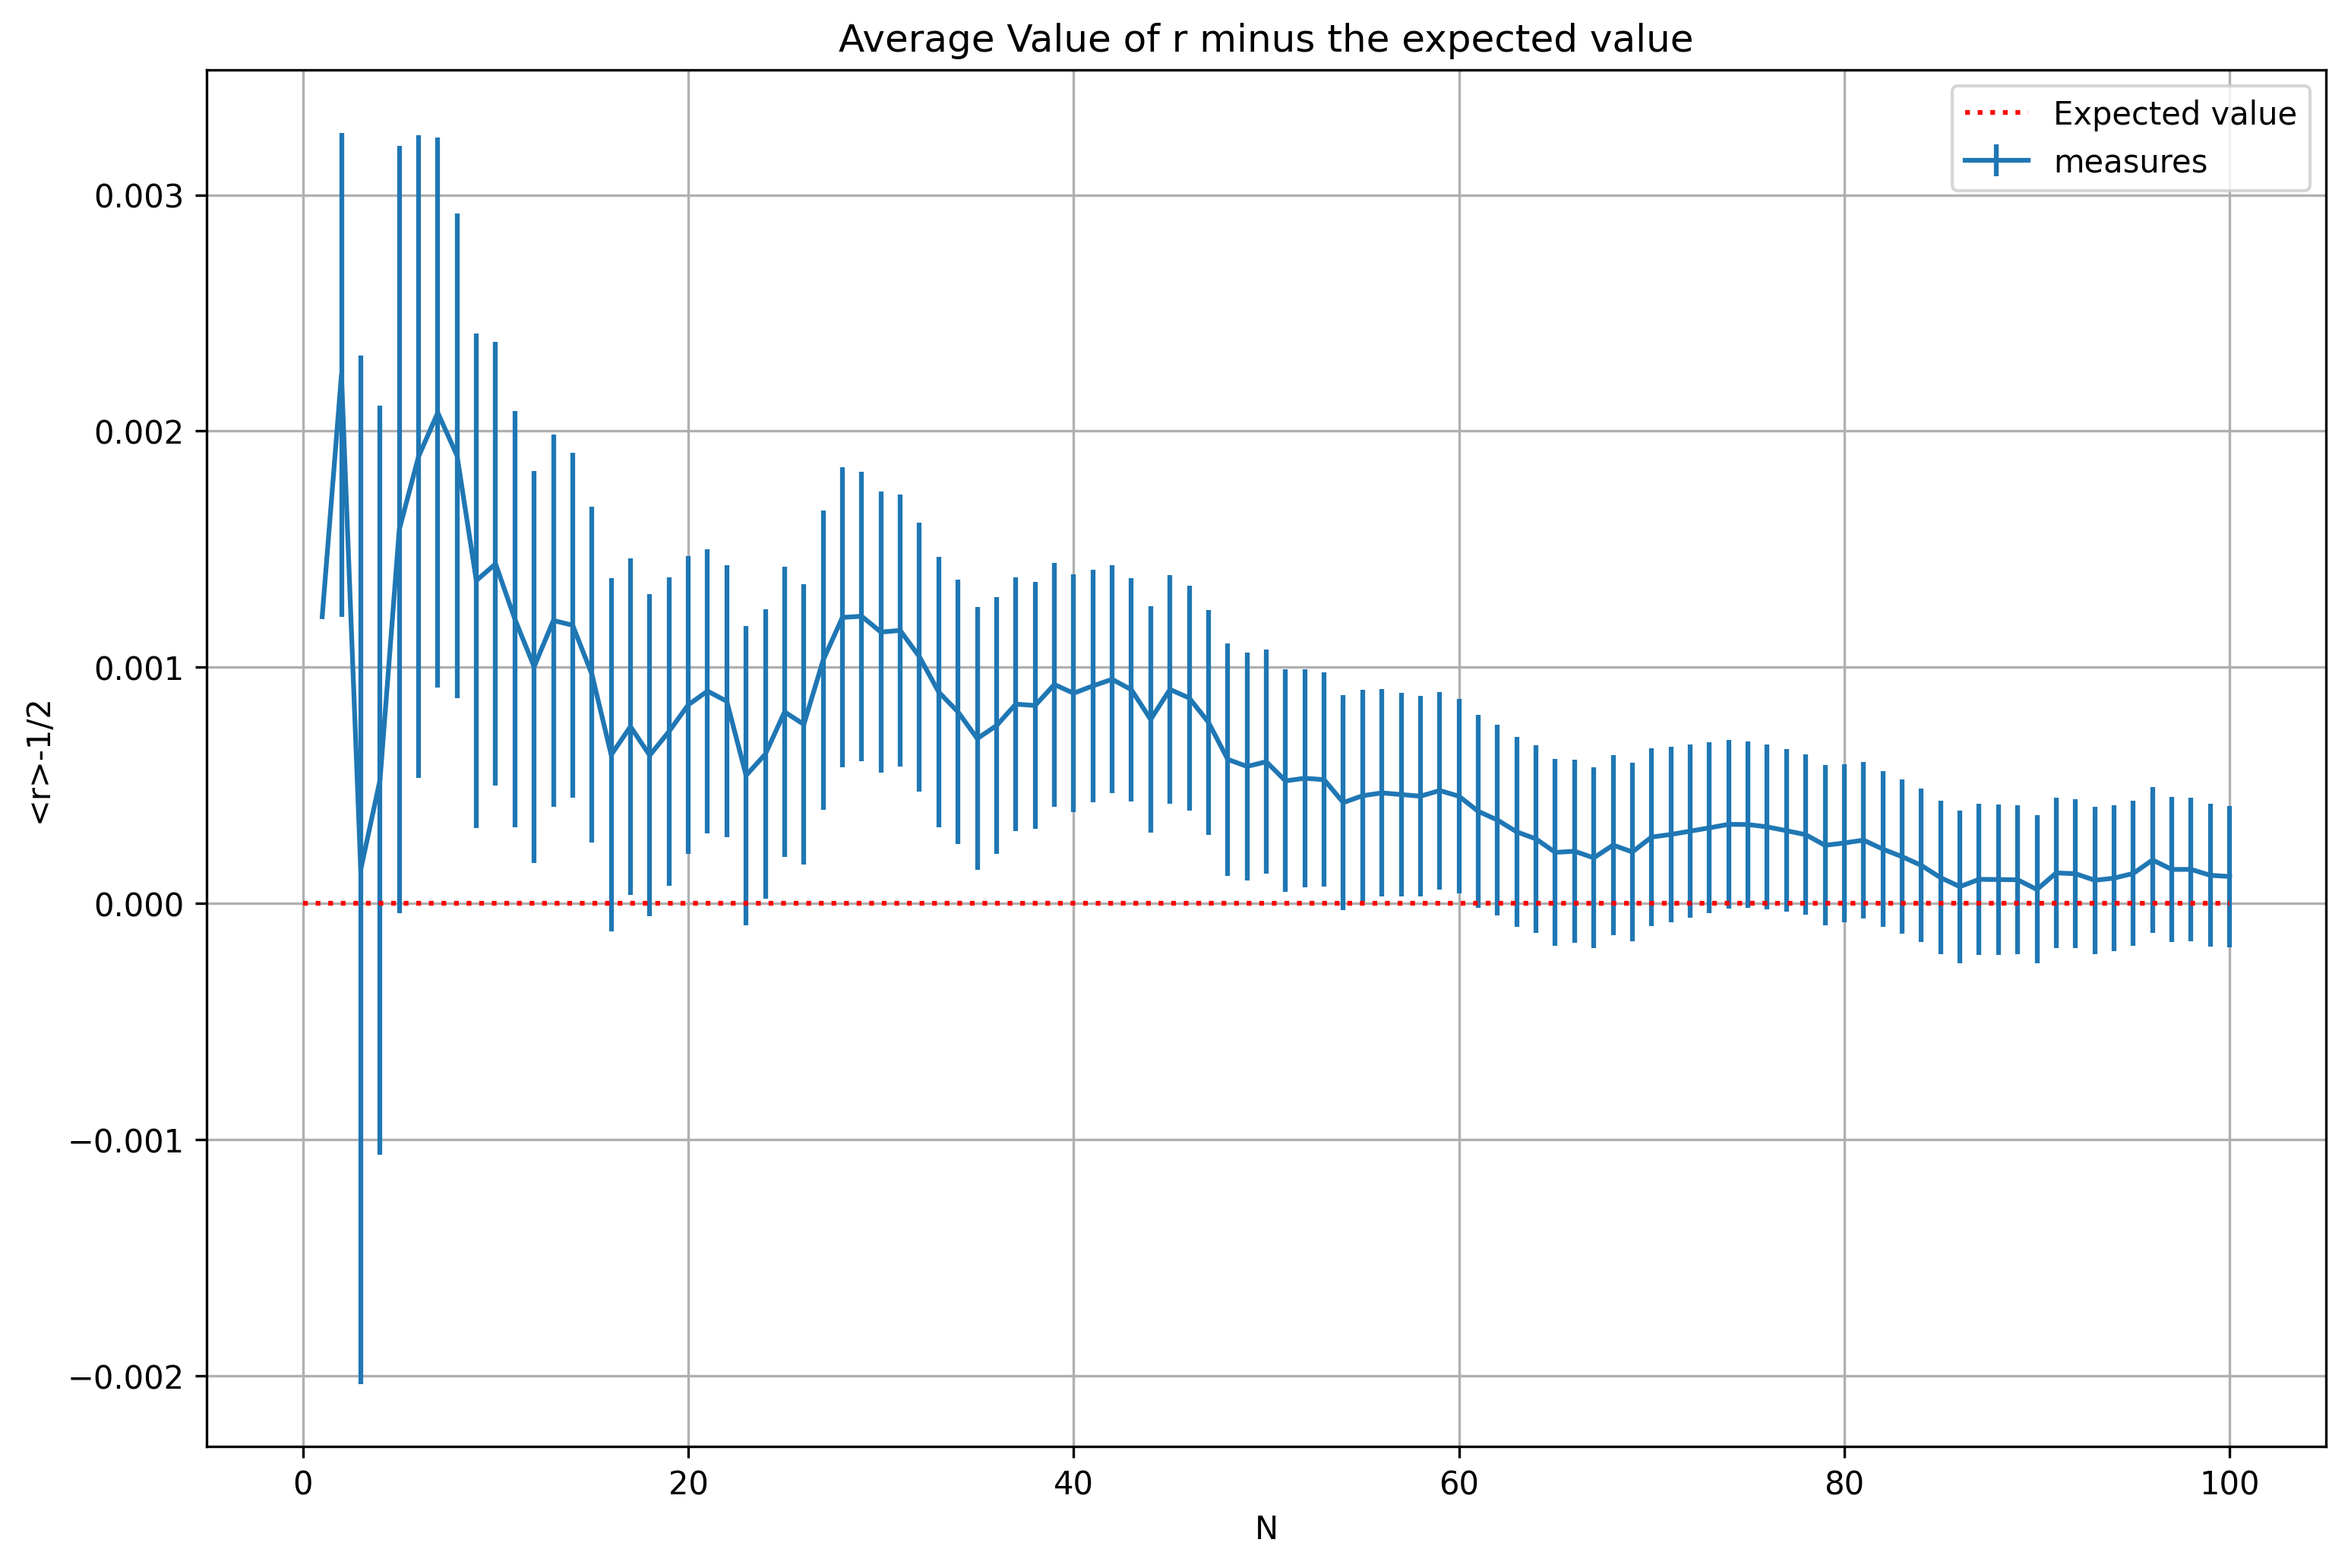

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, f, error = np.loadtxt("1.1/average.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(12,8),dpi=300)
plt.errorbar(x+1,f-0.5,yerr=error,label = "measures")
plt.xlabel('N')
plt.ylabel('<r>-1/2')
plt.grid(True)

plt.hlines(0,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.title("Average Value of r minus the expected value")
print("r average for N=100: ",f[99]," +- ", error[99])

plt.show()


The graph shows the tendency of the progressive average to approach the expected value as N is increased.
From  $N\simeq 60$ the progressive average value is within one standard deviation from the expected value.


In the same way it has been measured the average value of the variance and its uncertainty.

$\sigma^2 = \int_0^1 (r-\frac{1}{2})^2 dr =\frac {1}{12}$

variance average for N=100:  0.0834056  +-  7.8165e-05


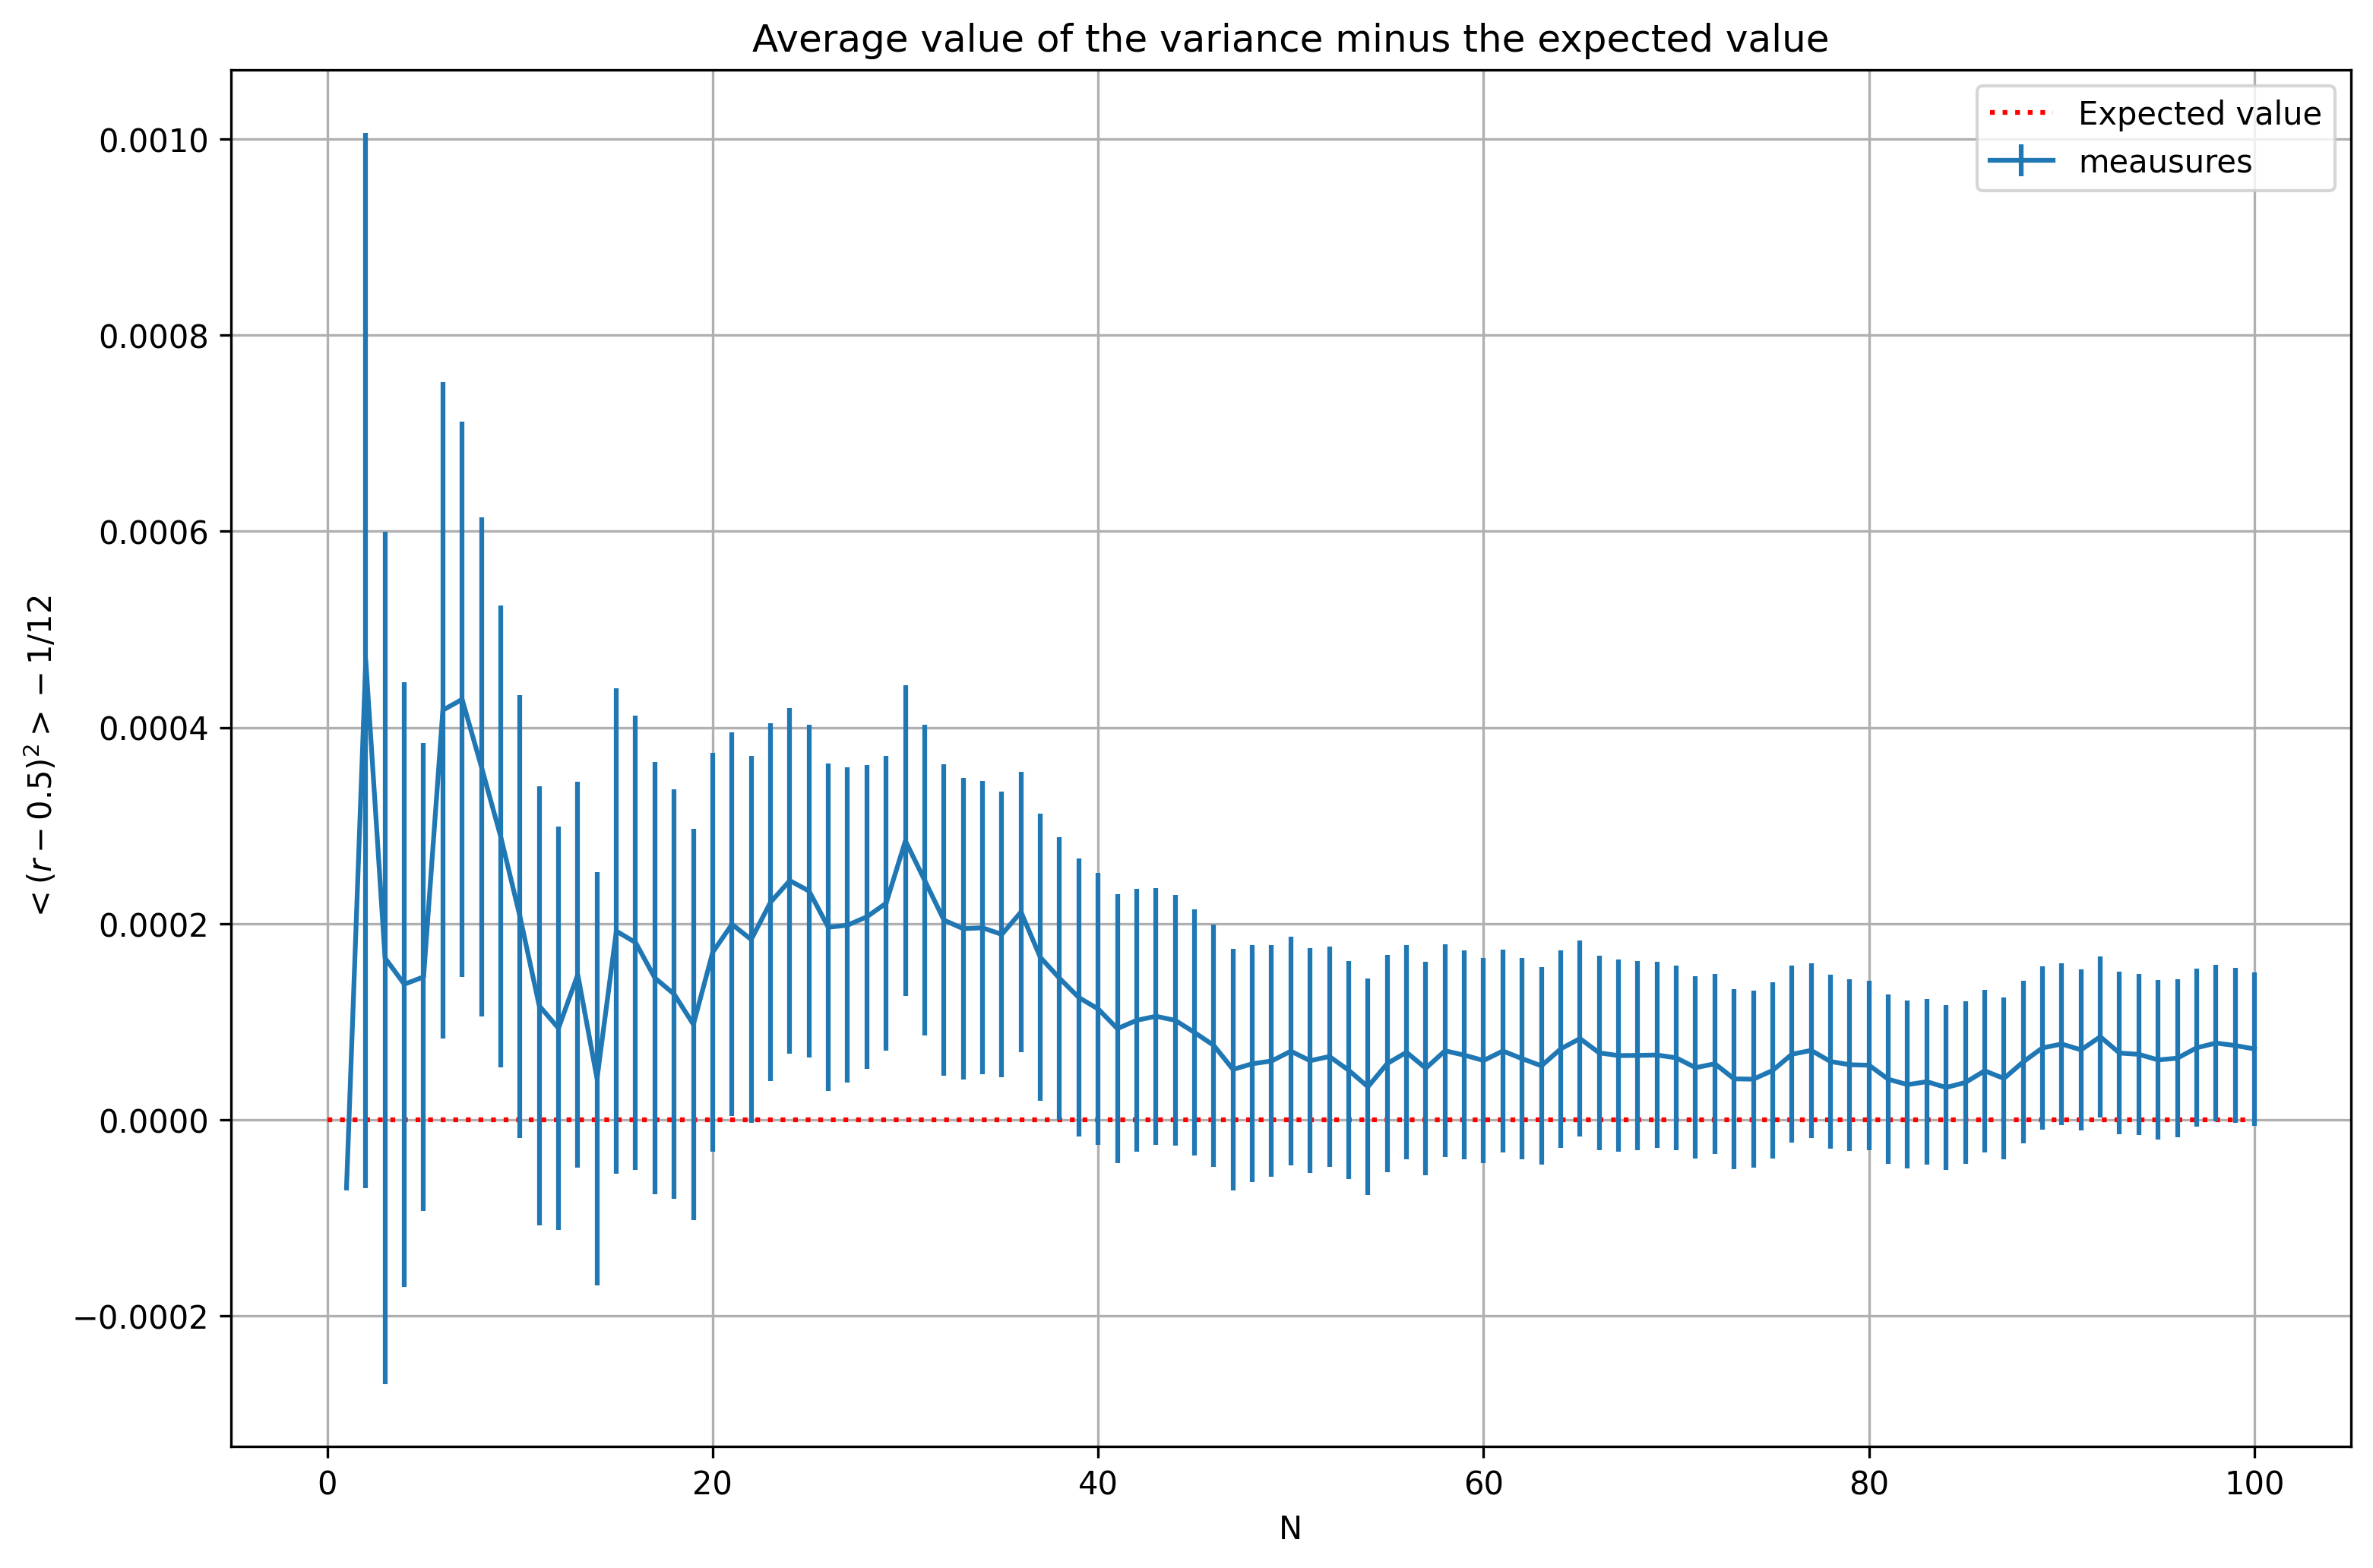

In [27]:
x, f, error = np.loadtxt("1.1/variance.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
fig=plt.figure(figsize=(12,8),dpi=300)
plt.hlines(0,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
print("variance average for N=100: ",f[99]," +- ", error[99])

plt.title("Average value of the variance minus the expected value")
plt.errorbar(x+1,f-1/12,yerr=error,label = "meausures")
plt.xlabel('N')
plt.ylabel('$<(r-0.5)^2>-1/12$')
plt.legend()
plt.grid(True)
plt.show()


In this part of the excercise, we use the $\chi^2$ test to verify if our numbers are not randomly generated.

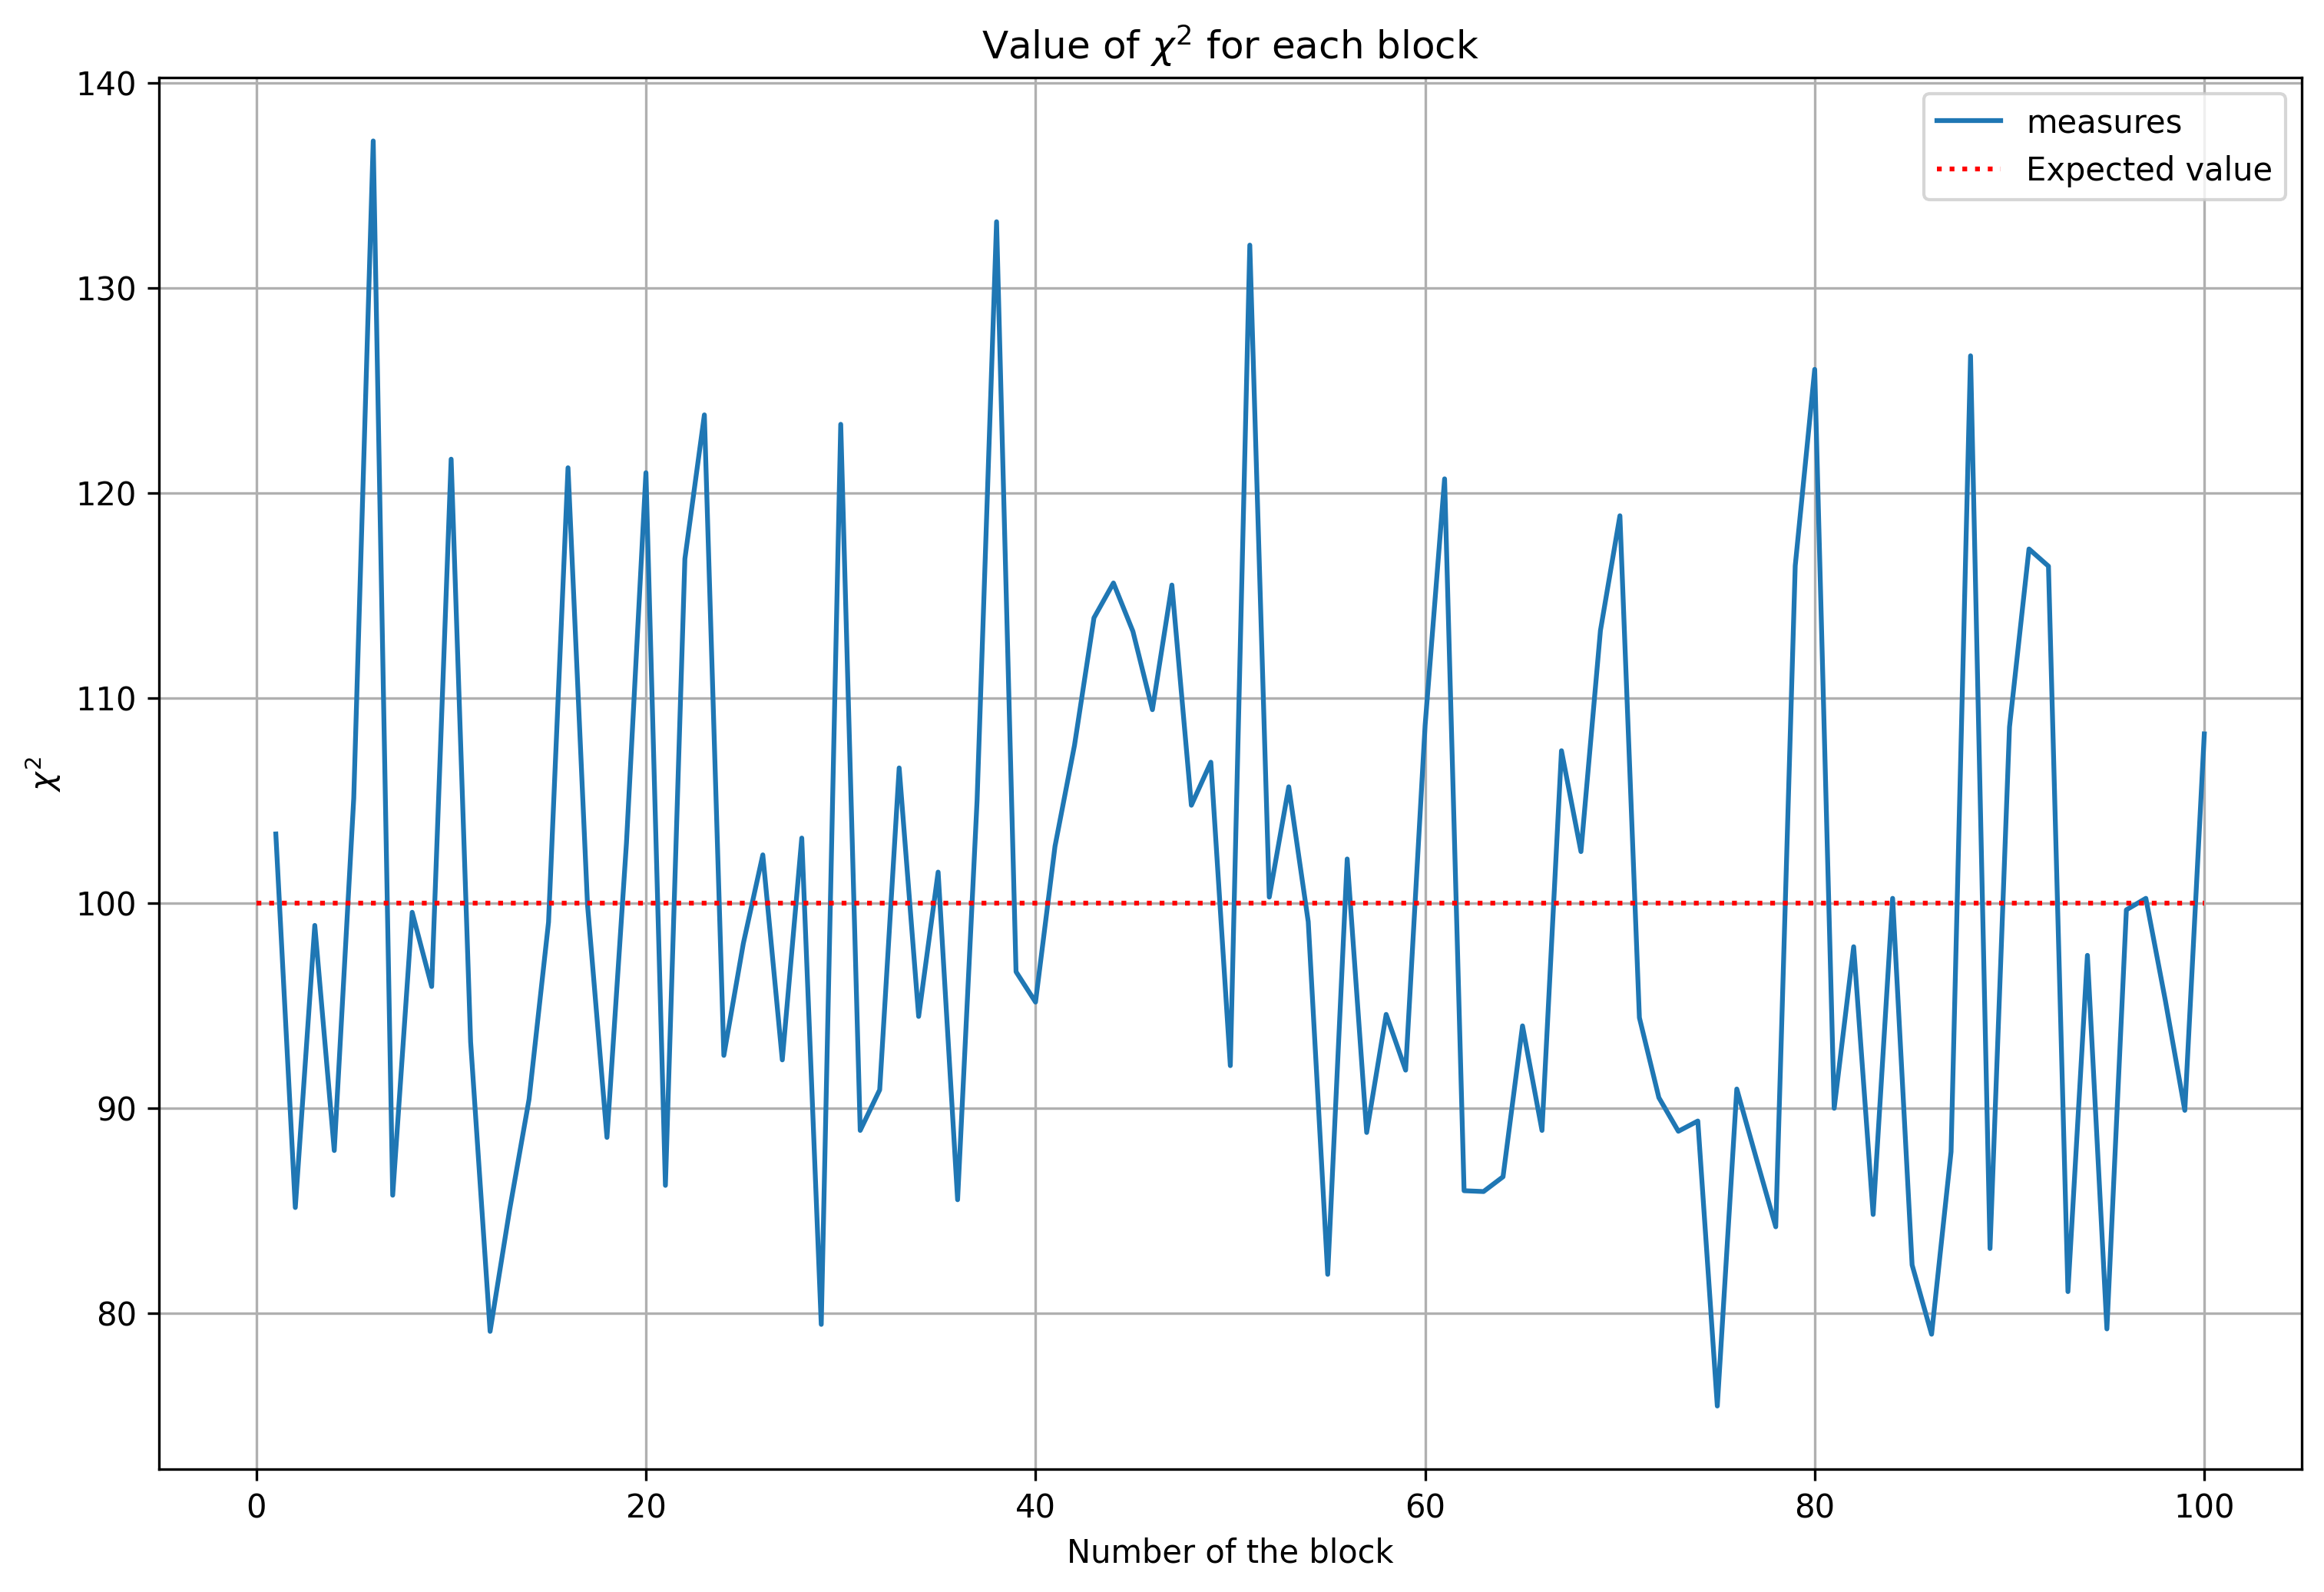

In [28]:
x, f = np.loadtxt("1.1/chi_squared.dat", usecols=(0,1), delimiter=' ', unpack='true')
fig=plt.figure(figsize=(12,8),dpi=300)
plt.plot(x+1,f,label = "measures")


plt.xlabel('Number of the block')
plt.ylabel('$\chi^2$')
plt.grid(True)
plt.title("Value of $\chi^2$ for each block")
plt.hlines(
    100,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)

plt.legend()
plt.show()

Since the expected value is 100 and the measures are in this range we cannot say that our numbers are not randomly distributed.

# Exercise 1.2

In the first part of the excercise, we extend the Parallel Number Generator with the:
1) exponential distribution: $p(x)=\lambda\exp(-\lambda x),\quad x\in[0,+\infty]$

2) Cauchy-Lorentz distribution: $p(x)=\frac{\Gamma}{\pi\cdot((x-\mu)^2+\Gamma^2)},\quad x\in[-\infty,+\infty]$

To obtain these probability distributions we use the **method of the inversion of the cumulative distribution**.

We first calculate the cumulative distributions: $$y=F(x)=\int_{a}^ x p(x')dx'$$

with $a=0$ for the exponential distribution and $a=-\infty$ for the Cauchy-Lorentz one.

Then we can calculate:$$x=F^{-1}(y)$$
where y is extracted from a uniform distribution in $[0,1)$.

For these two particular distributions we obtain:

1) $x=-\frac{\ln(1-y)}{\lambda}$

2) $x=\Gamma\tan(\pi(y-\frac{1}{2}))$


In the second part of the excercise, we want to test the *Central limit theorem* for different distributions.

1) standard dice: uniform distribution in $[0,7)$;

2) exponential dice: exponential distribution with $\lambda=1$;

3) Lorentzian dice: Cauchy-Lorentz distribution with $\mu=0,\quad\Gamma=1$. 

For each distribution we calculate 10000 times the quantity:$$S_N=\frac{\sum_{i=1}^N x_i}{N}$$
for different values of N $(1,2,10,100)$.
The $x_i$ are random variables extracted from the considered distribution.



The first two distributions are a uniform distribution  and an exponential one.
Since their variance is finite, we expect the sum of a large number of indipendent variables identically distributed to approach a Gaussian distribution.
The third one is a Cauchy-Lorentz distribution, which has not a finite variance. But since it is stable we expect the sum of a large number of indipendent variables to approach a Cauchy distribution.





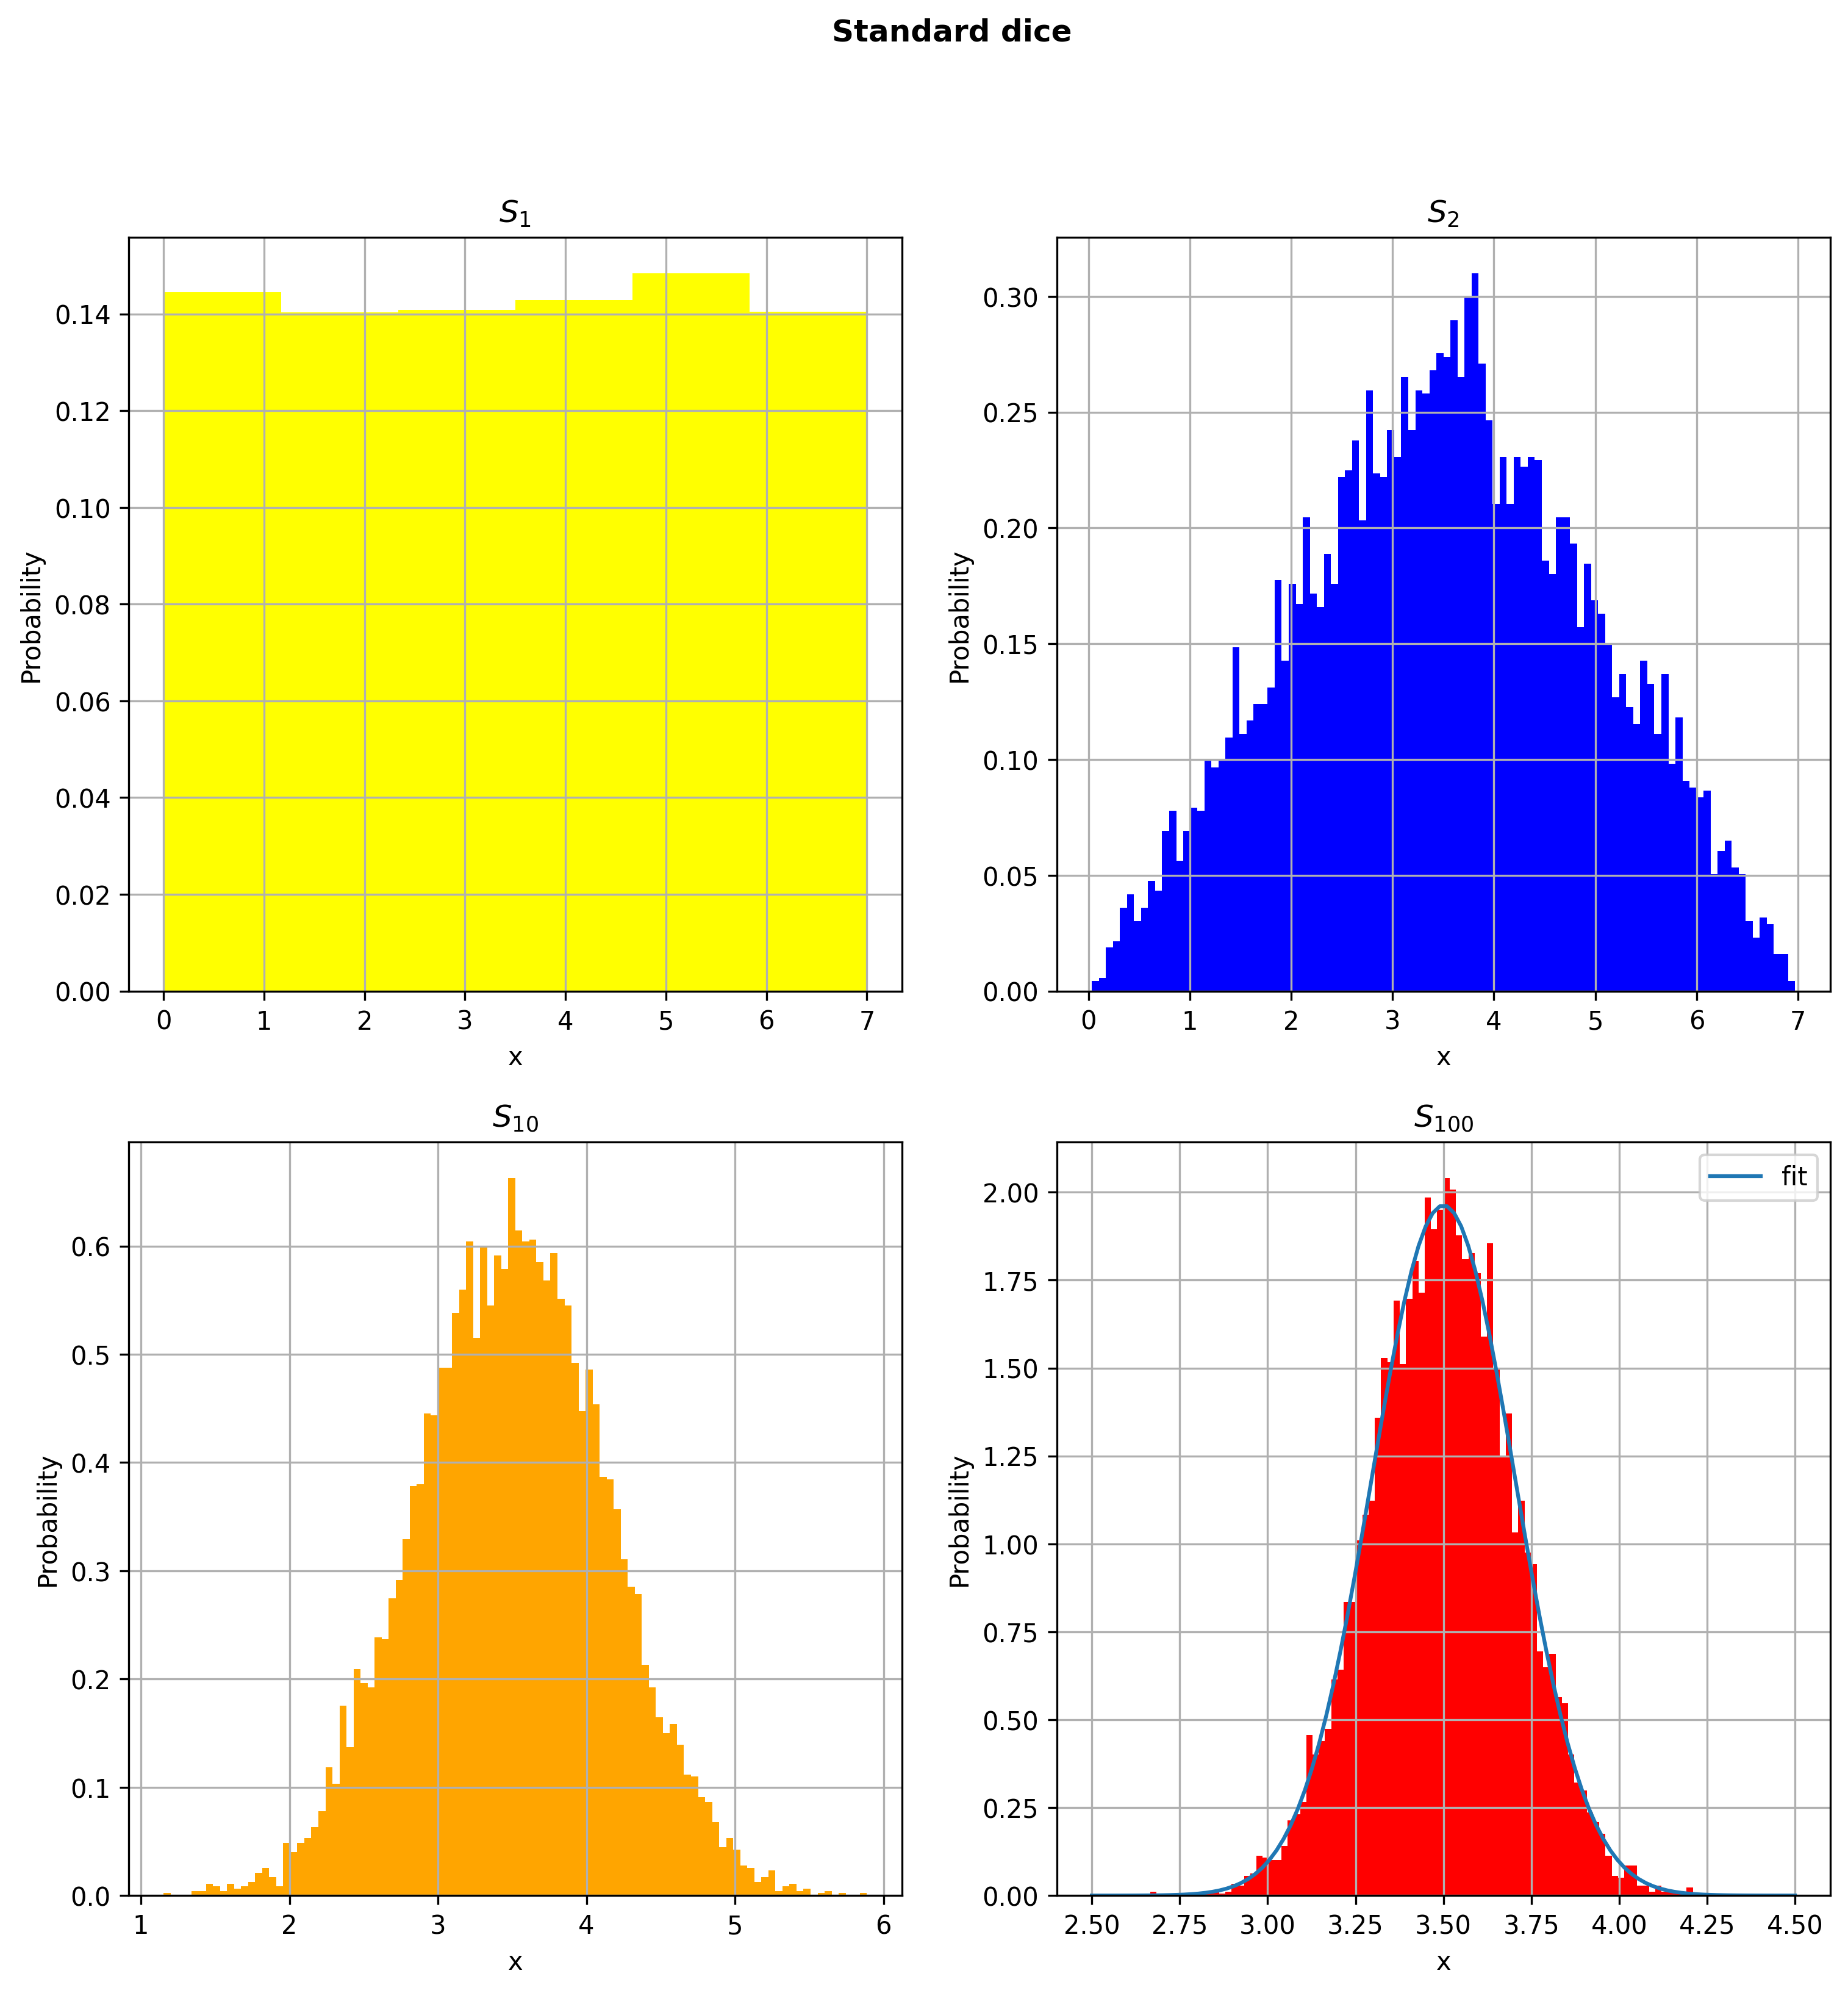

In [29]:
from scipy.stats import norm

x1, x2, x10, x100 = np.loadtxt("1.2/uniform.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')


# the histogram of the data
fig=plt.figure(figsize=(12,12),dpi=300)
plt.suptitle("Standard dice",weight="bold")


#N=1
plt.subplot(221)
plt.hist(x1,6,density=True, color="yellow")

plt.title("$S_1$")
plt.xlabel('x')
plt.ylabel('Probability')

plt.grid(True)


#N=2
plt.subplot(222)
plt.hist(x2,100,density=True, color="blue")
plt.title("$S_{2}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=10
plt.subplot(223)
plt.hist(x10,100,density=True, color="orange")
plt.title("$S_{10}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=100
plt.subplot(224)
plt.hist(x100,100,density=True, color="red")
plt.title("$S_{100}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)

#fit
k= norm.fit(x100)
x=np.linspace(2.5,4.5,100)
y=norm.pdf(x,*k)
plt.plot(x,y,label="fit")
plt.legend()


plt.show()


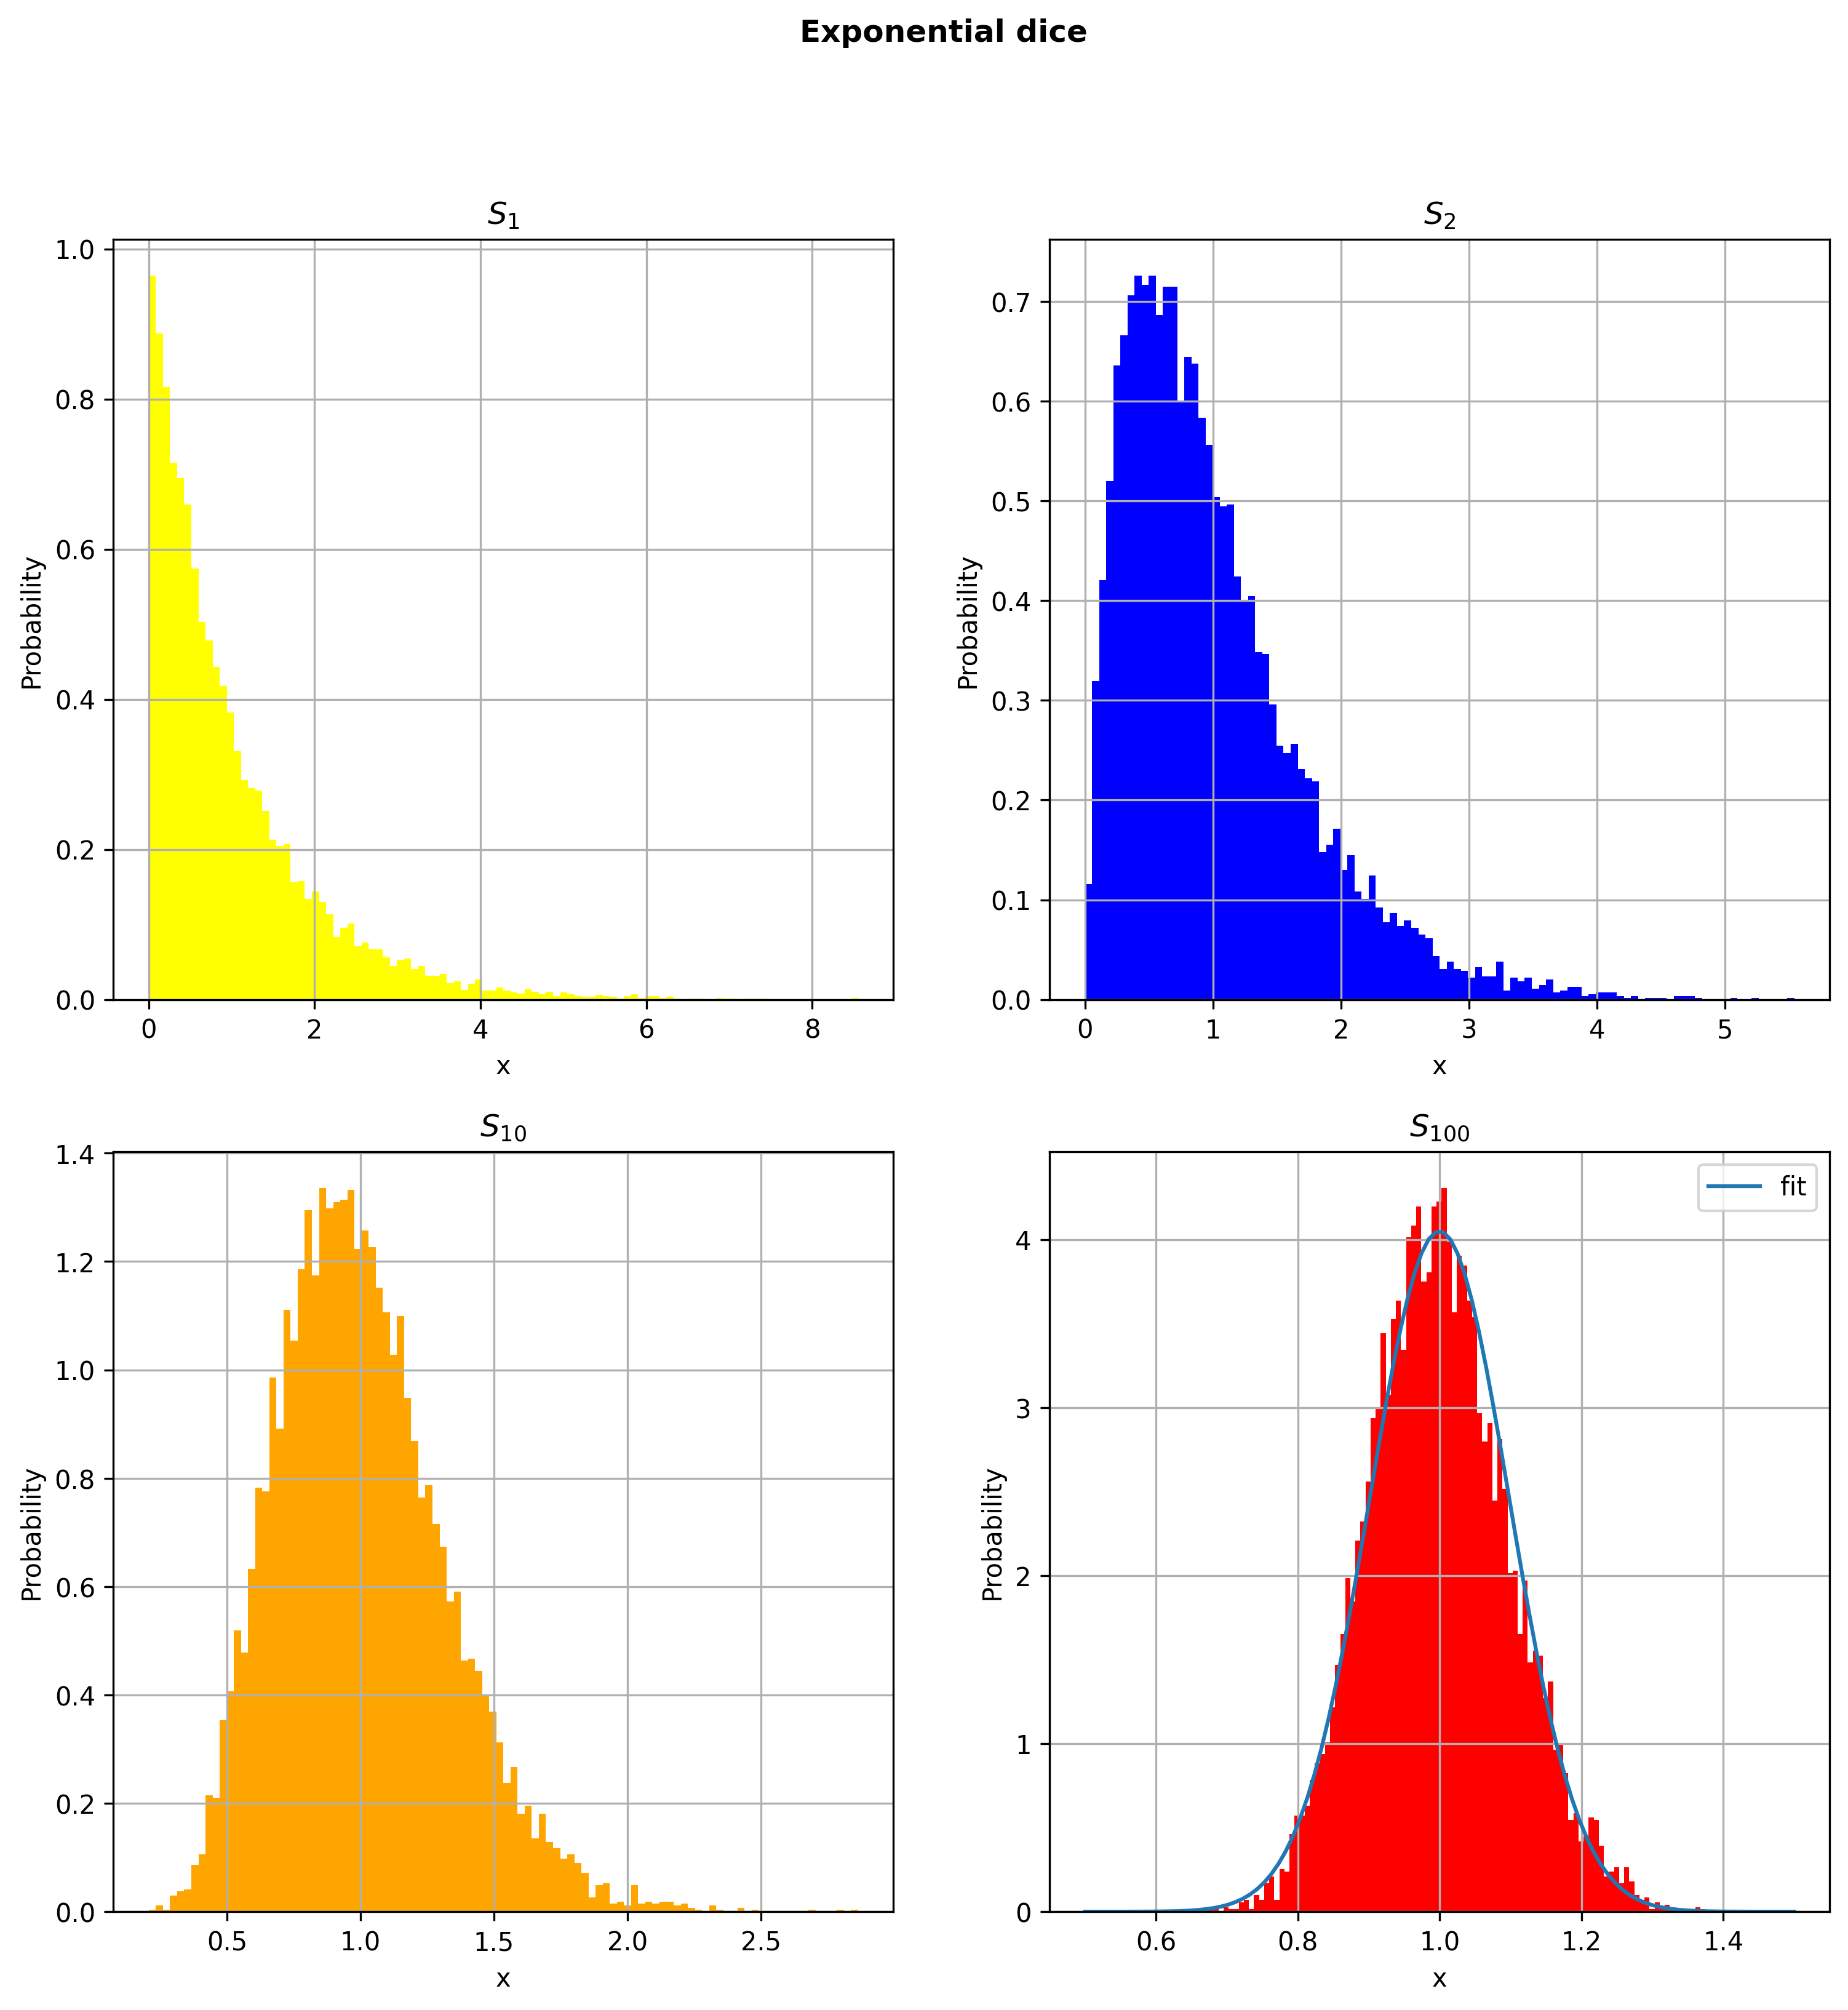

In [30]:
from scipy.stats import norm

x1, x2, x10, x100 = np.loadtxt("1.2/exponential.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')


# the histogram of the data
fig=plt.figure(figsize=(12,12),dpi=300)
plt.suptitle("Exponential dice",weight="bold")


#N=1
plt.subplot(221)
plt.hist(x1,100,density=True, color="yellow")
plt.title("$S_1$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=2
plt.subplot(222)
plt.hist(x2,100,density=True, color="blue")
plt.title("$S_{2}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=10
plt.subplot(223)
plt.hist(x10,100,density=True, color="orange")
plt.title("$S_{10}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=100
plt.subplot(224)
plt.hist(x100,100,density=True, color="red")
plt.title("$S_{100}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)

#fit
k= norm.fit(x100)
x=np.linspace(0.5,1.5,100)
y=norm.pdf(x,*k)
plt.plot(x,y,label="fit")
plt.legend()
plt.show()


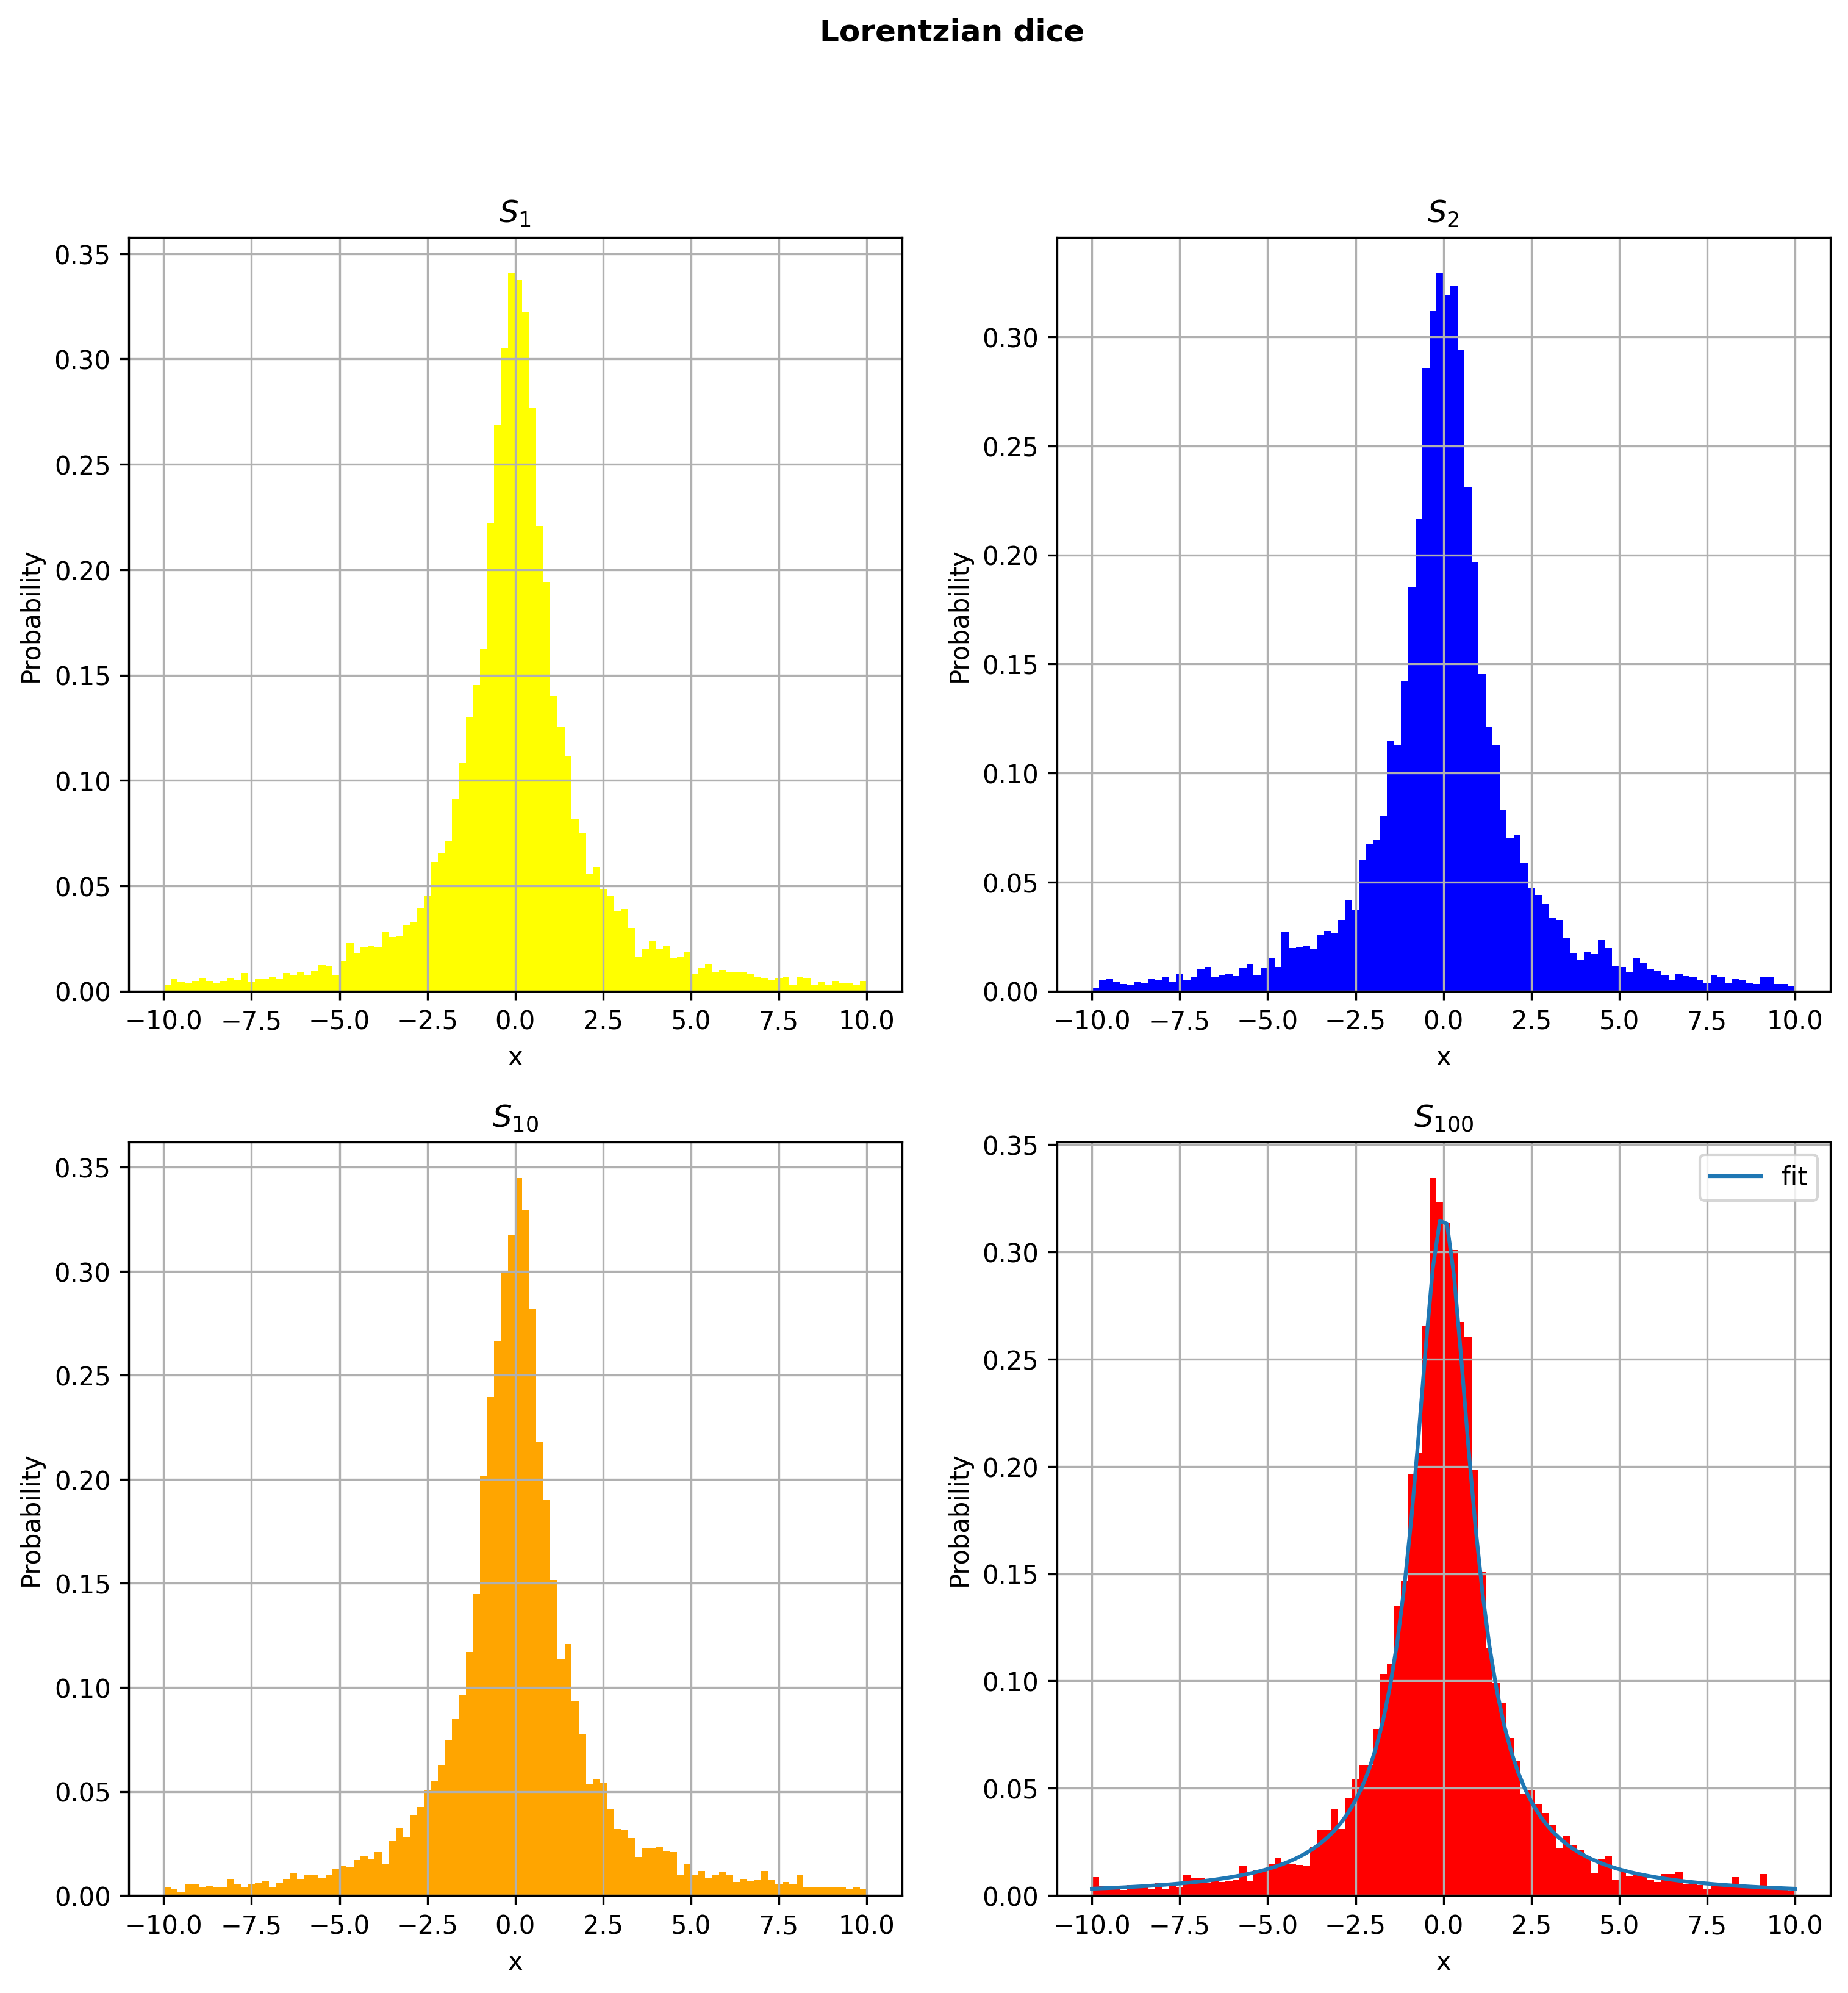

In [31]:
from scipy.stats import cauchy

x1, x2, x10, x100 = np.loadtxt("1.2/Lorentzian.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')


# the histogram of the data
fig=plt.figure(figsize=(12,12),dpi=300)
plt.suptitle("Lorentzian dice",weight="bold")


#N=1
plt.subplot(221)
plt.hist(x1,100,density=True, color="yellow",range=(-10,10))
plt.title("$S_1$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=2
plt.subplot(222)
plt.hist(x2,100,density=True, color="blue",range=(-10,10))
plt.title("$S_{2}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=10
plt.subplot(223)
plt.hist(x10,100,density=True, color="orange",range=(-10,10))
plt.title("$S_{10}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)


#N=100
plt.subplot(224)
plt.hist(x100,100,density=True, color="red",range=(-10,10))
plt.title("$S_{100}$")
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)

#fit
k= cauchy.fit(x100)
x=np.linspace(-10,10,100)
y=cauchy.pdf(x,*k)
plt.plot(x,y,label="fit")
plt.legend()

plt.show()


All the graphs with N=100 behave as expected.

# Excercise 1.3 Buffon's needle problem

In this problem we are given a needle of lenght $L$ and a horizontal plane ruled with parallel lines distanced by $d$ $(d>L)$.
The probability that the needle after being thrown intersects a line is: $$ P=\frac{2L}{\pi d}$$

P can be calculated experimentally as:
$$P=\lim_{N_{thr}\to\infty} \frac{N_{hit}}{N_{thr}}$$
where $N_{hit}$ is the number of times the needle crossed a line and $N_{thr}$ is the number of throws of the needle.


So we obtain:$$\pi=\lim_{N_{thr}\to\infty}\frac{2LN_{thr}}{N_{hit}d}$$

## <span style="color:red"> *Algorithm*



To determine the position of the needle, we identify the position $(x,y)$ of its center and its orientation $\theta$ relative to the horizonal axis.
The reference frame is taken to have the x-axis orthogonal to the parallel lines, with a line passing through the origin.

Since the problem is periodic with period d, we can reduce it to the interval $[0,d)$.

- x is chosen randomly in the interval $[0,d)$;
- to determine $\theta$, we generate 2 random numbers (a,b) within a circle of radius 1 and calculate: $$\theta=\arctan{\frac{b}{a}} \quad,  \quad  \theta\in[-\frac{\pi}{2},\frac{\pi}{2}]$$  




- a line is crossed when $$x-\frac{L\cos(\theta)}{2}\leq0\quad \lor  \quad x+\frac{L\cos(\theta)}{2}\geq d$$
Notice that the y coordinate is not relevant.

pi average for N=100:  3.14158  +-  0.00425899


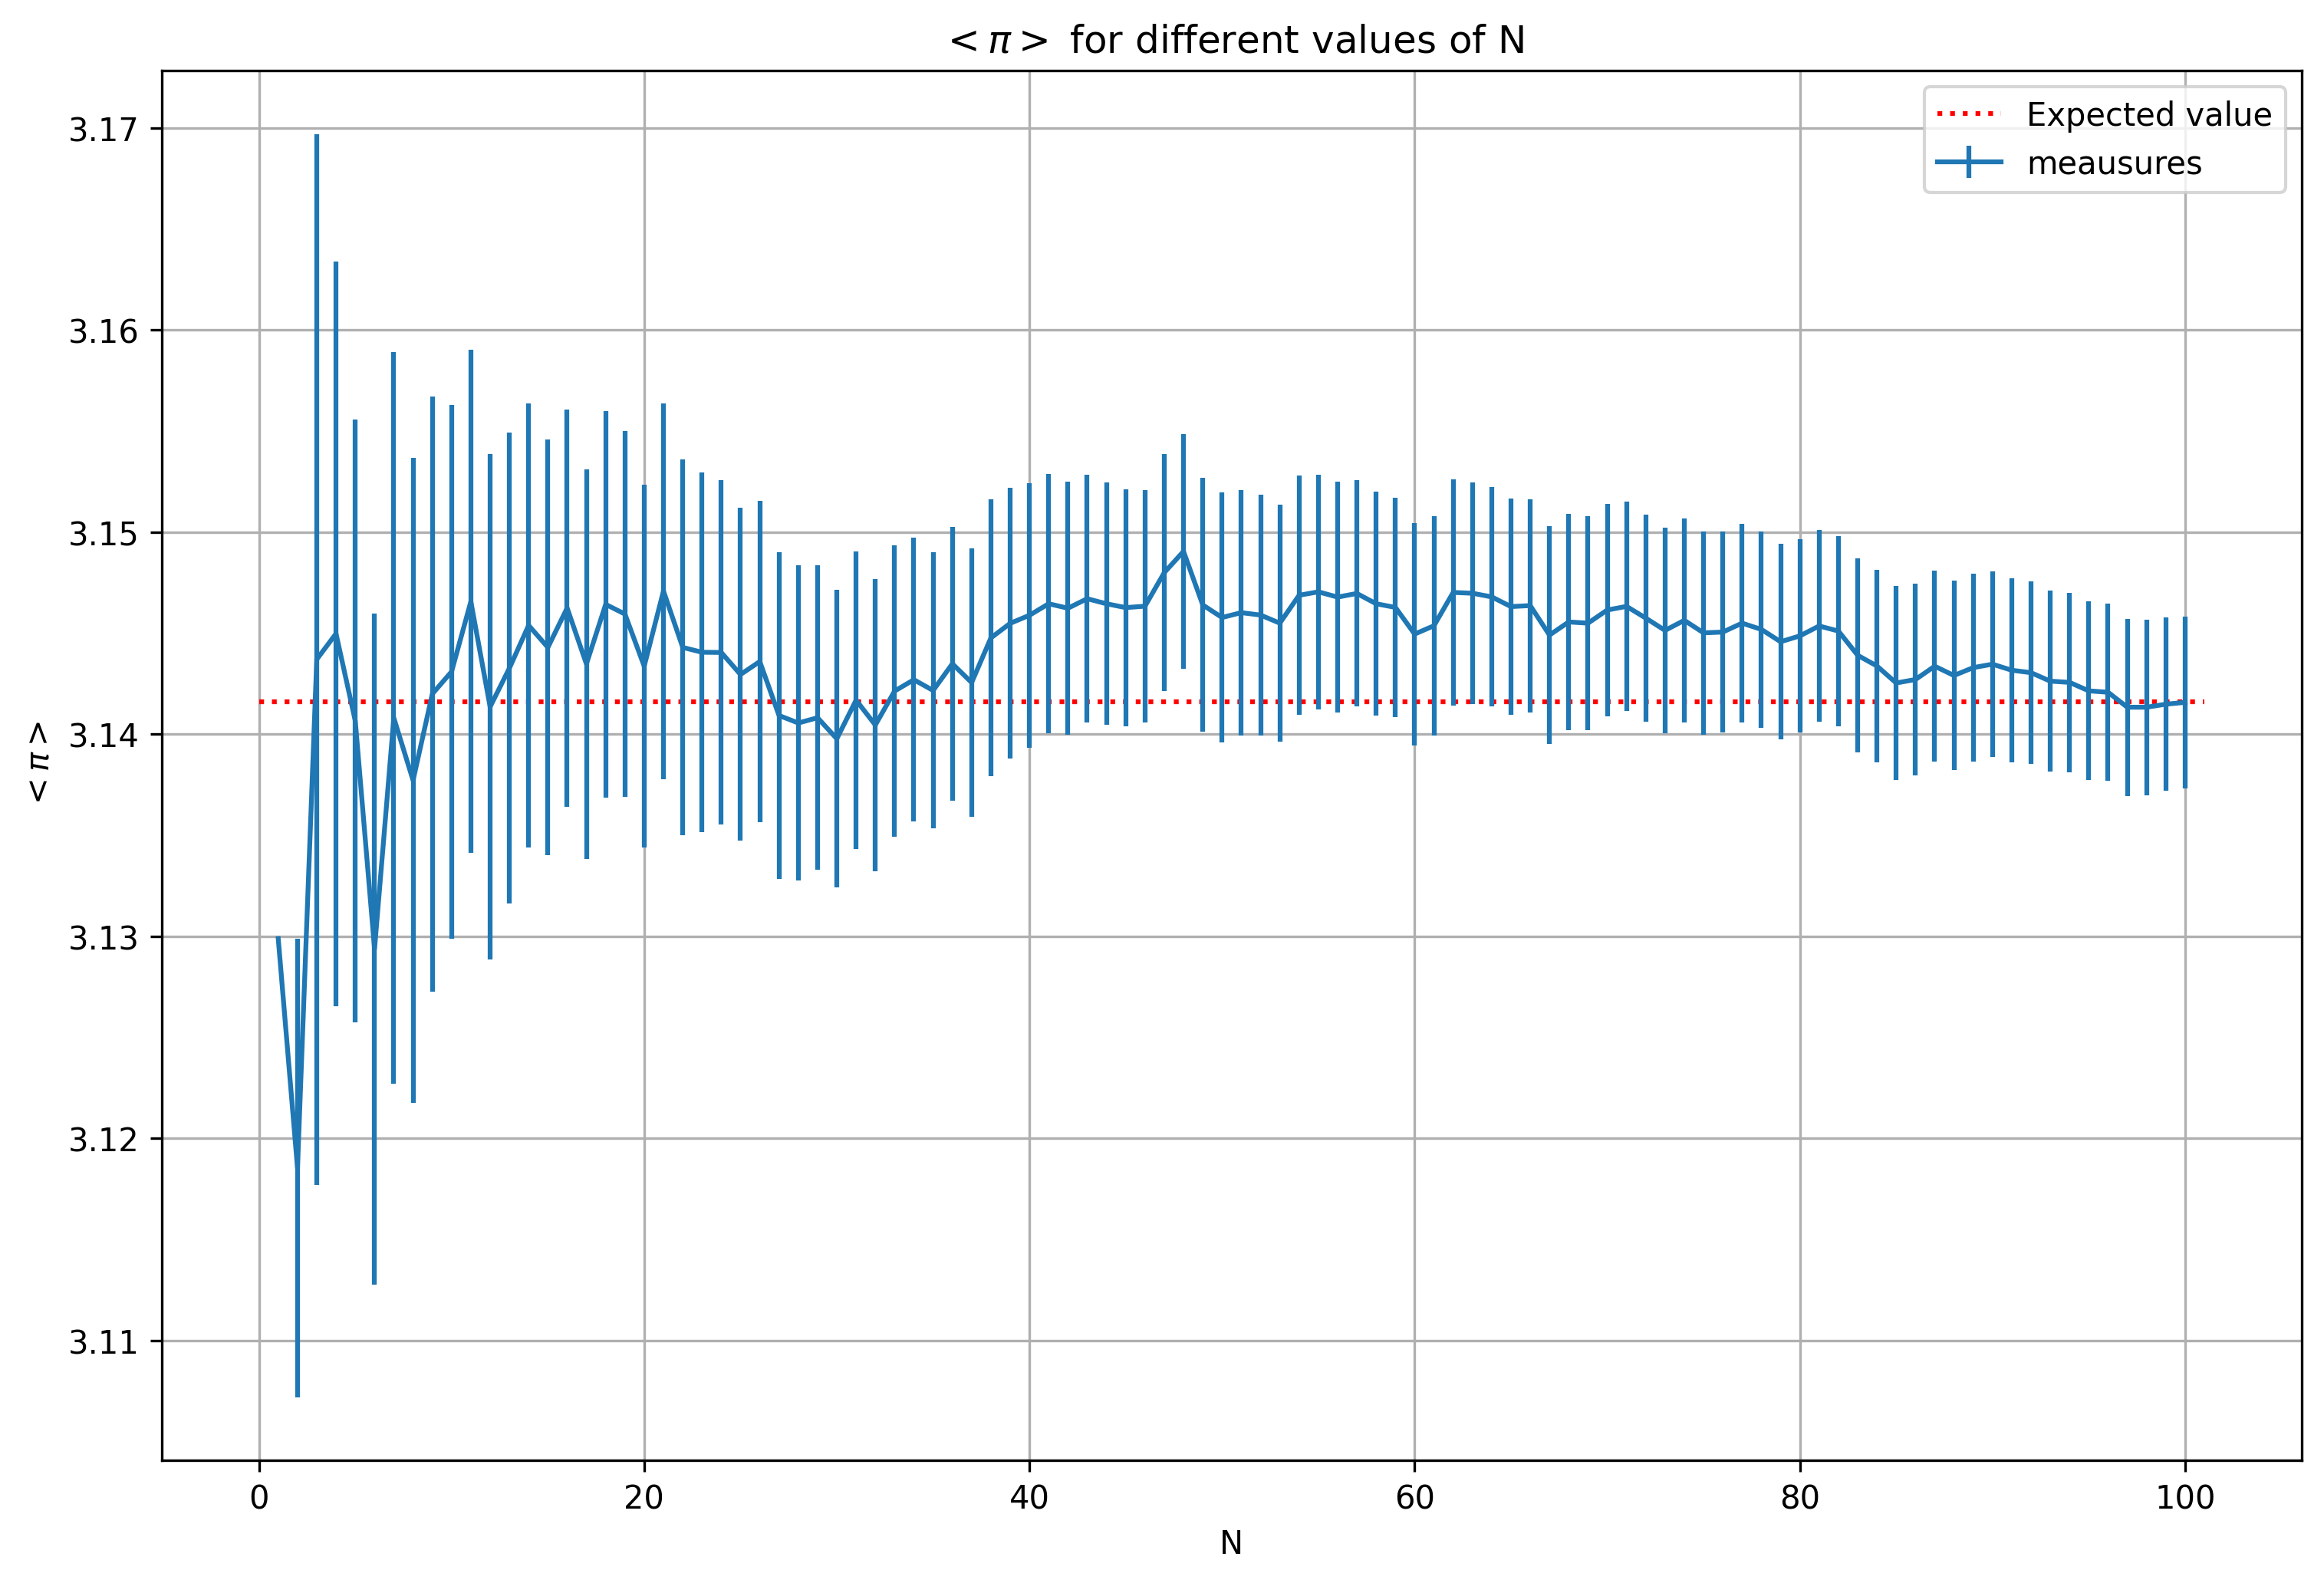

In [32]:
x, f, error = np.loadtxt("1.3/pi_average.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
fig=plt.figure(figsize=(12,8),dpi=300)
plt.hlines(np.pi,0,101,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.errorbar(x/10000+1,f,yerr=error,label = "meausures")
plt.xlabel('N')
plt.ylabel('$<\pi>$')
plt.legend()
plt.title("$<\pi>$ for different values of N")

print("pi average for N=100: ",f[99]," +- ", error[99])

plt.grid(True)
plt.show()


To calculte this values we used the Data Blocking method with 100 blocks and 10000 throws in each block.
We can see that the average value of $\pi$ approaches the expected value and it is within a standard deviation range for $N \geq 50$